In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# data analysis

train_dataset = h5py.File("train_cats.h5", "r")
train_dataset

<HDF5 file "train_cats.h5" (mode r)>

In [3]:
test_dataset = h5py.File("test_cats.h5", "r")
test_dataset

<HDF5 file "test_cats.h5" (mode r)>

In [4]:
train_dataset["train_set_x"]

<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">

In [5]:
print(type(train_dataset["train_set_x"][:]))
print(type(train_dataset["train_set_y"][:]))
print(type(test_dataset["test_set_x"][:]))
print(type(test_dataset["test_set_y"][:]))
print(train_dataset["train_set_x"][:].shape)
print(train_dataset["train_set_y"][:].shape)
print(test_dataset["test_set_x"][:].shape)
print(test_dataset["test_set_y"][:].shape)
print(test_dataset["list_classes"][:])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)
[b'non-cat' b'cat']


In [6]:
# Loading the data

def load_data():
    train_dataset = h5py.File("train_cats.h5", "r")
    train_set_x = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File("test_cats.h5", "r")
    test_set_x = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    # Images have (64(width), 64(height), 3(RGB)) dimensions, we need to have all the pixels as features
    test_set_x = test_set_x.reshape(test_set_x.shape[0], -1).T # shape ((209)examples, (64)width, (64)height, (3)RGB) -> (64 * 64 * 3, 209)
    train_set_x = train_set_x.reshape(train_set_x.shape[0], -1).T # shape ((209)examples, (64)width, (64)height, (3)RGB) -> (64 * 64 * 3, 209)

    train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
    test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))
    
    return train_set_x, train_set_y, test_set_x, test_set_y, classes

train_set_x, train_set_y, test_set_x, test_set_y, classes = load_data()

In [7]:
print (train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape, classes.shape)

(12288, 209) (1, 209) (12288, 50) (1, 50) (2,)


y = [1], it's a 'cat' picture.


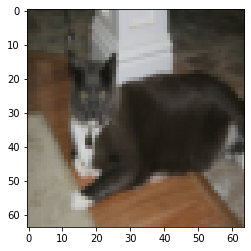

In [9]:
index = 47
plt.imshow(train_set_x[:, index].reshape((64, 64, 3)))
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [10]:
m_train = train_set_x.shape[1]
m_test = test_set_x.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

print ("\ntrain_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50

train_set_x shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x shape: (12288, 50)
test_set_y shape: (1, 50)


In [11]:
# standardize datasets

train_set_x = train_set_x / 255.
test_set_x = test_set_x / 255.

In [12]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1 / (1 + np.exp(-z))
        
    return s

In [13]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [14]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)    """
    
    
    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [15]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [16]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of size (number of features, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)    
    A = sigmoid(np.dot(w.T, X) + b) # compute activation
    cost = (-1/m) * (np.dot(Y, np.log(A).T) + (np.dot((1 - Y), np.log(1 - A).T)))  # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)    
    deltas_scaled = (A - Y) / m
    dw = np.dot(X, deltas_scaled.T)
    db = np.sum(deltas_scaled)
       
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [17]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.0014555781367842635
cost = 5.801545319394553


In [18]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of shape (number of features, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1 line of code)        
        grads, cost = propagate(w, b, X, Y)
                
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule        
        w = w - learning_rate * dw
        b = b - learning_rate * db
                
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [19]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [20]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of size (number of features, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m), dtype=np.int32)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture    
    A = sigmoid(np.dot(w.T, X) + b)
            
    # Convert probabilities A[0,i] to actual predictions p[0,i]
    # Variable with probabilities called Y_prediction
    Y_prediction[0] = np.array([1 if p >= 0.5 else 0 for p in A[0]])    
        
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [21]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1 1 0]]


In [22]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (number of features, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (number of features, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)   

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [23]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "non-cat" picture.


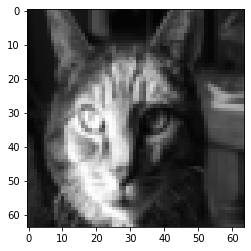

In [24]:
# Example of a picture that was classified.
index = 30
plt.imshow(test_set_x[:,index].reshape((64, 64, 3)))
print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0, index])].decode("utf-8") +  "\" picture.")

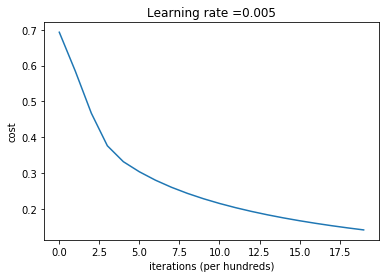

In [25]:
# Plot learning curve (with costs)
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel("iterations (per hundreds)")
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



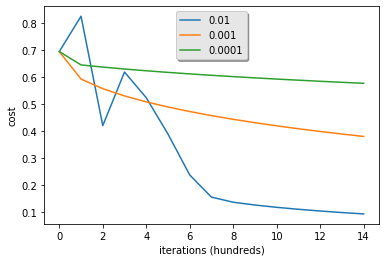

In [26]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=i, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label=str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [27]:
# Using sklearn

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

/home/ihor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0])

In [28]:
clf.predict_proba(X[:2, :])

array([[9.81784157e-01, 1.82158291e-02, 1.43260034e-08],
       [9.71695007e-01, 2.83049626e-02, 2.99716397e-08]])

In [29]:
clf.score(X, y)

0.9733333333333334

In [33]:
##############################################################
# применение модели scikit learn для датасетов из train_cats.h5 и test_cats.h5

train_set_x, train_set_y, test_set_x, test_set_y, classes = load_data()
print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(12288, 209) (1, 209) (12288, 50) (1, 50)


In [34]:
# преобразуем в привычный формат - из (n_features x n_samples) в (n_samples x n_features)

train_set_x = train_set_x.T
train_set_y = train_set_y.T
test_set_x = test_set_x.T
test_set_y = test_set_y.T
print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(209, 12288) (209, 1) (50, 12288) (50, 1)


In [35]:
# standardize datasets

train_set_x = train_set_x / 255.
test_set_x = test_set_x / 255.

In [36]:
clf = LogisticRegression(solver='lbfgs', random_state=0).fit(train_set_x, train_set_y.ravel())

/home/ihor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
clf.score(train_set_x, train_set_y)

1.0

In [38]:
clf.score(test_set_x, test_set_y)

0.72

In [39]:
# change the inverse of regularization parameter value to C=10 (C=1 by default)

clf = LogisticRegression(solver='newton-cg', random_state=0, C=10).fit(train_set_x, train_set_y.ravel())

In [40]:
clf.score(train_set_x, train_set_y)

1.0

In [41]:
clf.score(test_set_x, test_set_y)

0.72

In [42]:
predictions_test = clf.predict(test_set_x)

In [43]:
print(test_set_x.shape)
print(test_set_y.shape)
print(predictions_test.shape)

(50, 12288)
(50, 1)
(50,)


y = 1, you predicted that it is a "cat" picture.


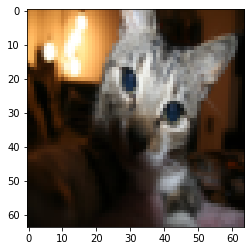

In [44]:
# Example of a picture that was classified.

#test_set_x = test_set_x.T
#test_set_y = test_set_y.T

index = 40
plt.imshow(test_set_x[index, :].reshape((64, 64, 3)))
print ("y = " + str(test_set_y[index, 0]) + ", you predicted that it is a \"" + classes[int(predictions_test[index])].decode("utf-8") +  "\" picture.")

In [63]:
np.logspace(0, 10, 3)

array([1.e+00, 1.e+05, 1.e+10])

In [45]:
# Using LogisticRegressionCV

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-1, 2, 10)

# inverse of regularization parameter values used for cross-validation
clf_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
clf_searcher.fit(train_set_x, train_set_y.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.2s finished
/home/ihor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV(Cs=array([  0.1       ,   0.21544347,   0.46415888,   1.        ,
         2.15443469,   4.64158883,  10.        ,  21.5443469 ,
        46.41588834, 100.        ]),
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=1)

In [46]:
clf_searcher.Cs_

array([  0.1       ,   0.21544347,   0.46415888,   1.        ,
         2.15443469,   4.64158883,  10.        ,  21.5443469 ,
        46.41588834, 100.        ])

In [47]:
# best C (for highest score)

clf_searcher.C_

array([4.64158883])

In [48]:
clf_searcher.scores_

{1: array([[0.45238095, 0.45238095, 0.42857143, 0.45238095, 0.45238095,
         0.47619048, 0.47619048, 0.47619048, 0.47619048, 0.47619048],
        [0.54761905, 0.54761905, 0.57142857, 0.54761905, 0.54761905,
         0.54761905, 0.54761905, 0.54761905, 0.54761905, 0.54761905],
        [0.52380952, 0.5       , 0.5       , 0.5       , 0.5       ,
         0.5       , 0.5       , 0.5       , 0.5       , 0.5       ],
        [0.64285714, 0.64285714, 0.64285714, 0.64285714, 0.66666667,
         0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
        [0.56097561, 0.58536585, 0.58536585, 0.58536585, 0.58536585,
         0.58536585, 0.58536585, 0.58536585, 0.58536585, 0.58536585]])}

In [49]:
# change the inverse of regularization parameter value to C=4.64 (C=1 by default)

clf = LogisticRegression(solver='newton-cg', random_state=0, C=4.64).fit(train_set_x, train_set_y.ravel())

In [50]:
clf.score(train_set_x, train_set_y)

1.0

In [51]:
clf.score(test_set_x, test_set_y)

0.72